1. Introduction

# Predictive Analytics for Stock Market Trends Using Machine Learning

This project applies machine learning techniques to predict future stock prices based on historical data. We explore both traditional models and deep learning for time-series forecasting.


2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


3. Load Dataset

In [2]:
# Download stock data from Yahoo Finance
df = yf.download("RELIANCE.NS", start="2015-01-01", end="2023-12-31")
df.head()


/tmp/ipython-input-2-3300846275.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2015-01-01,190.758667,191.639525,189.845584,190.414929,2963643
2015-01-02,190.253784,192.509638,189.985239,190.801631,7331366
2015-01-05,188.169800,191.403188,187.793822,190.135610,10103941
2015-01-06,179.629807,187.557498,178.748949,186.912974,18627980
2015-01-07,183.539963,184.506755,179.823193,179.844676,20720312


4. Data Preprocessing

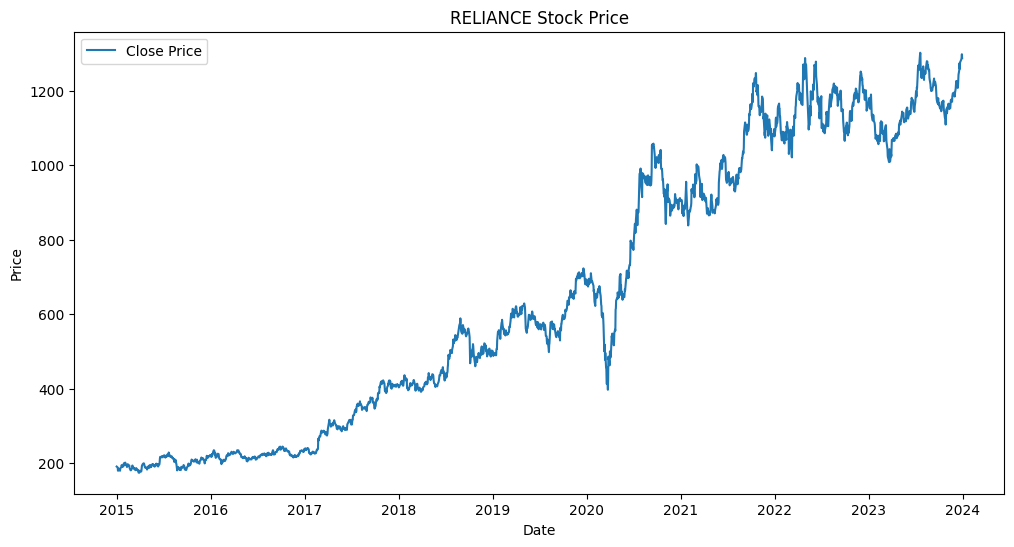

In [3]:
# Drop missing values
df.dropna(inplace=True)

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('RELIANCE Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


5. Feature Engineering
python
Copy
Edit


In [4]:
# Use just 'Close' price for prediction
close_data = df[['Close']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Create sequences
def create_dataset(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

window_size = 60
x, y = create_dataset(scaled_data, window_size)

# Reshape input for LSTM [samples, time steps, features]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))


6. Build LSTM Model

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x, y, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0493
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.7325e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 7.8471e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 7.7531e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.4360e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 6.4873e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 6.0478e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.8433e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 5.4827e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.4301e-04


7. Prediction and Visualization
python
Copy
Edit


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


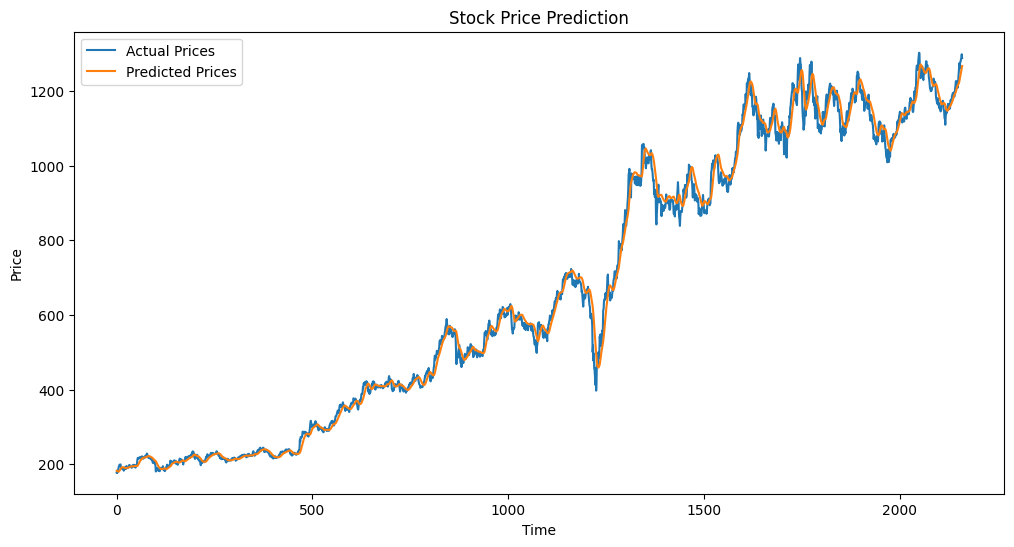

In [6]:
predicted = model.predict(x)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


8. Conclusion

The LSTM model captures the trend of stock price movements. While it may not be perfect due to stock market volatility, it provides a solid foundation for time-series prediction.
